## Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rawdata = pd.read_csv('Rawdata/train.csv')

In [3]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [4]:
rawdata.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


_____________________________________________________________________________________________________________________________________________________

## Finding missing values in the training dataset

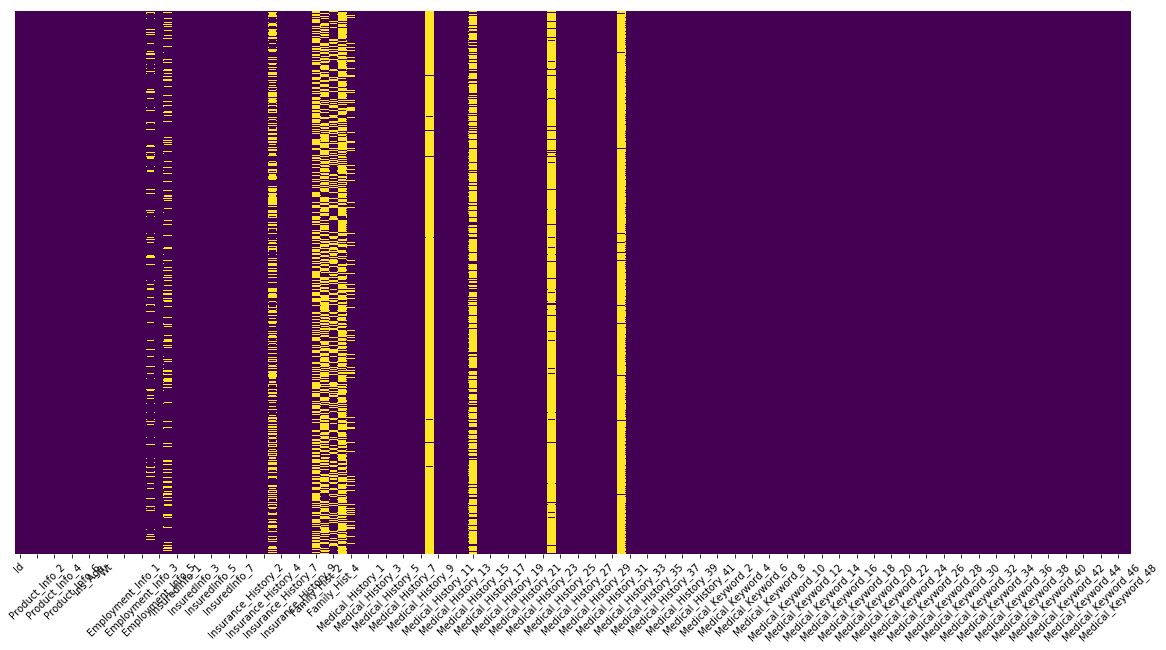

In [5]:
plt.figure(figsize=(20, 10))
nv = sns.heatmap(rawdata.isnull(), yticklabels=False,cbar=False,cmap='viridis')
nv.set_xticklabels(
    nv.get_xticklabels(),
    rotation=45
);

Seaborn helps to visualize if there are null values present in the dataset. Now that we have figured out there are, we need to find those features and check if they are salvagable through data augmentation or have to get rid of it.

Listing out columns with null values

In [6]:
rawdata.columns[rawdata.isnull().any()]

Index(['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
       'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1',
       'Medical_History_10', 'Medical_History_15', 'Medical_History_24',
       'Medical_History_32'],
      dtype='object')

Here we can see that columns listed may have various degree of missing values and might be relevant to predict the outcome. So we need to find columns who have more than 50% missing values so that they can be eliminated as they won't help the model predict the outcome in the way other columns could.

Below are the list of columns that have more than 50% of missing values and will be dropped from the main training dataset as augmenting the data will be less useful for the correctness of predictions

In [7]:
rawdata.columns[rawdata.isna().mean().round(4) * 100 > .5]

Index(['Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
       'Medical_History_24', 'Medical_History_32'],
      dtype='object')

In [8]:
rawdata = rawdata.drop(['Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
       'Medical_History_24', 'Medical_History_32'], axis = 1)

In [9]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 116 entries, Id to Response
dtypes: float64(6), int64(109), object(1)
memory usage: 52.6+ MB


Now we have 116 features in the dataset after dropping the columns with more than 50% missing values. Let's check how many columns we have with missing values

In [10]:
rawdata.columns[rawdata.isnull().any()]

Index(['Employment_Info_1'], dtype='object')

There is only one column has null values now which is 'Employment_Info_1'. As they are integers, they can be replaced by the mean values.

In [11]:
rawdata['Employment_Info_1'].fillna((rawdata['Employment_Info_1'].mean()), inplace=True)

In [12]:
rawdata.columns[rawdata.isnull().any()]

Index([], dtype='object')

In [13]:
rawdata.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


As there are no null values in the dataset. It's time to do some exploratory analysis to find what the data really consists of.

___________________________

## Exploratory Data Analysis

We know that this is a insurance applicant data consisting of the person's medical and some of the insurance data. We can explore applicants age, height, wt and the risk factor to see how they are correlated with each other.

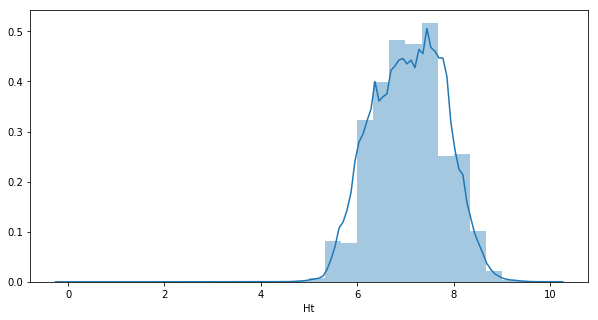

In [14]:
plt.figure(figsize=(10, 5))
sns.distplot(rawdata['Ht']*10, bins = 30)

This histogram shows that the 'Height' of the applicants ranges between 4ft and 10ft assuming the values indicated are the actual values rather than scaled values

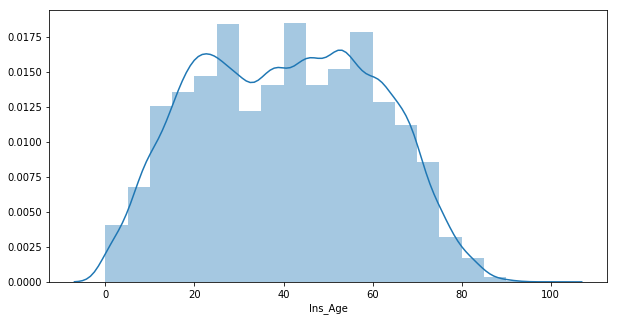

In [15]:
plt.figure(figsize=(10, 5))
sns.distplot(rawdata['Ins_Age']*100, bins = 20)

The age histogram showcases the number of applicants and their age who have applied for the insurance.
We can see that the max number of people are around the age of 25,40 and 60 years old.

Let's look into it in more detial by looking at the Probability and Cumilative Distribution function to undertand how many values lie in a what range.

[2.03432074e-02 3.39670939e-02 6.29494283e-02 6.78163049e-02
 7.35420421e-02 9.22348899e-02 6.11306647e-02 7.01571210e-02
 9.24201344e-02 7.03255250e-02 7.61186238e-02 8.91699365e-02
 6.42292989e-02 5.60617032e-02 4.29261885e-02 1.61667874e-02
 8.36968054e-03 1.80192317e-03 2.35765649e-04 3.36808070e-05]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


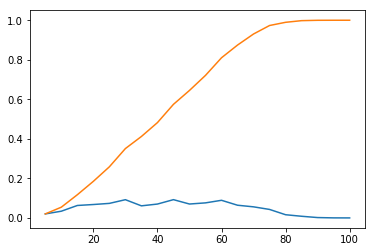

In [16]:
# Building PDF and CDF plots
counts, bin_edges = np.histogram(rawdata['Ins_Age']*100, bins = 20, density = True)
pdf = counts/sum(counts)
print(pdf)
print (bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

Here we can see that the most of the applicant are around the age of 25, 45 and 60. Almost 98% of the applicant are below the age of 72 years.

Now let's try to figure out the relationship between the Age and the risk factors(response) and see how different age groups have different risk factors associated with their applications.

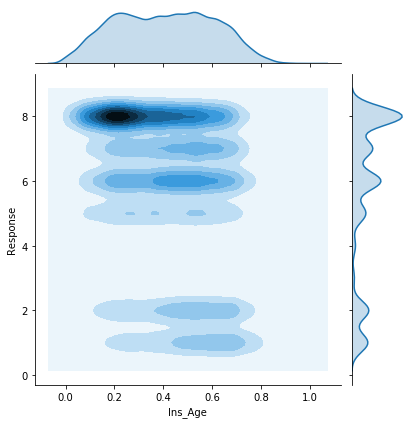

In [17]:
sns.jointplot(x='Ins_Age',y='Response', data=rawdata, kind='kde')
plt.show()

Here we can see that this plot tells lot of details. We can see from the plot that it is less risky for the company to give insurance to the applicants who are ono the younger side of the range. Lot of applicants have risk factor of 8 specially in the age range of 0 to 40 which can be seen by the **GREY** bars and line. We can also see that many applicants having a risk factor of 1 who are above the age of 60. It is represented by the **BLUE** bars and line showcasing the probability distribution function.

<Figure size 720x720 with 0 Axes>

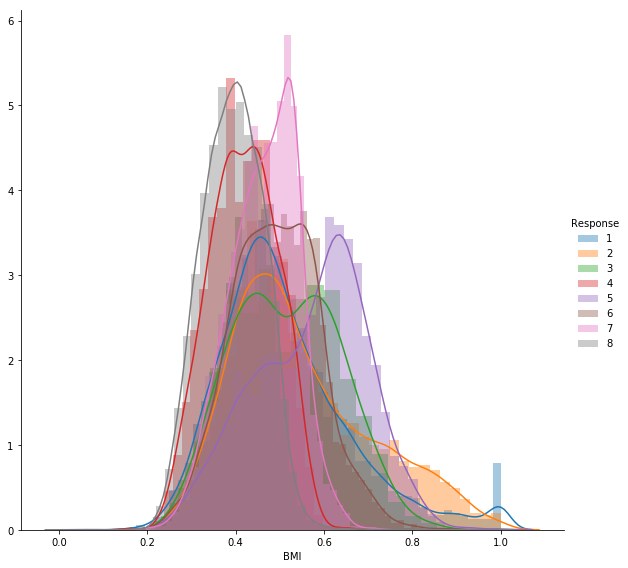

In [18]:
plt.figure(figsize=(10,10))
sns.FacetGrid(rawdata, hue = 'Response', height = 8).map(sns.distplot,'BMI').add_legend()

This is a very interesting plot which shows the relation of a person's BMI with the risk factor. It showcases that there are lot of people in the BMI range of 20 and 60. Lot of people with BMI between 20 and 50 have risk factor of 8 and the risk factor gradually decreases as we can see from the change of colors in the plot. As the BMI goes on incresing we can see that risk factor decreses to 2 and 1, which means that it is very risky for the insurance company to give those applicants insurance.

After plotting several graphs we can see that there are some data points which seems bit off than the other regular data points. It can be outliers. One of the ways to detect outliers is to plot boxplots of columns to figure them out.

___________________

### Finding Anamolies

Let's check if there are anamolies in Weight, Height, BMI and age features.

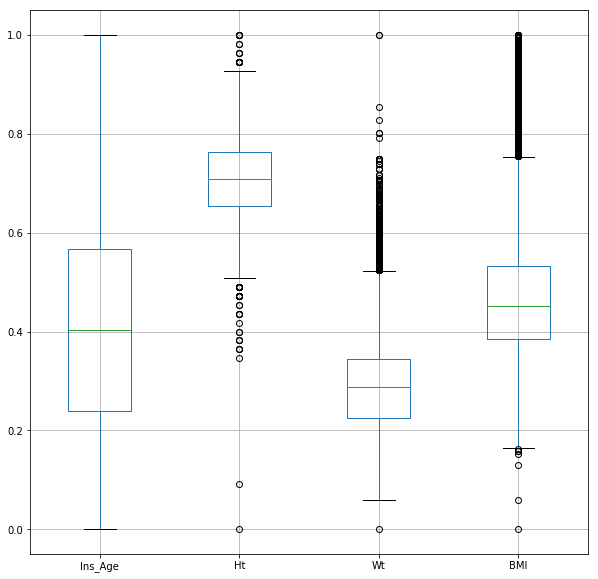

In [19]:
plt.figure(figsize=(10,10))
rawdata.boxplot(column=['Ins_Age','Ht','Wt','BMI'])

We can see that there are ouliers in the dataset and need to be removed from the dataset for better model predictions of risk factors. One of the ways to get rid of outliers is to use Z-score to find data points within 3 standard deviation and discard the rest.

Before jumping in directly to remove outliers, we need to make sure to deal with categorical data that can be useful for predictions.
Checking for categorical features. 

In [20]:
cols = rawdata.columns

In [21]:
num_cols = rawdata._get_numeric_data().columns

In [22]:
list(set(cols) - set(num_cols))

['Product_Info_2']

There is just one column in the dataset which is categorical and it needs to be converted to numerical either by one hot encoding or using label encoding. Since there are lot of features and doing one-hot encoding is only going to add more complexity for the model during prediction.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
rawdata['Product_Info_2'] = LabelEncoder().fit_transform(rawdata['Product_Info_2'])

### Removing ouliers outside 3 standard deviations

Getting rid of ouliers witht the help of Z-score where only datapoints within 3rd quartile are considered.

In [25]:
from scipy import stats
rawdata = rawdata[(np.abs(stats.zscore(rawdata)) < 3).all(axis=1)]

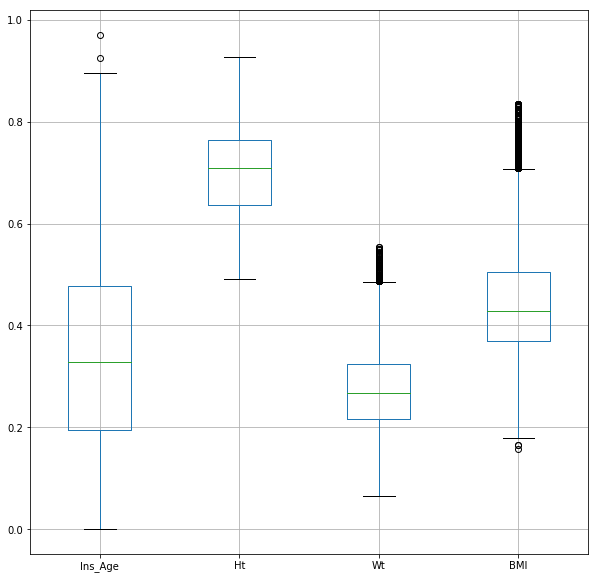

In [26]:
plt.figure(figsize=(10,10))
rawdata.boxplot(column=['Ins_Age','Ht','Wt','BMI'])

Here we can see that most of the ouliers have been removed and only the ones which were within the 3rd standard deviation are kept for further processing.

Now let's plot a corellation matrix to see the degree of corellation between age, weight, height, BMI and response(risk factor)

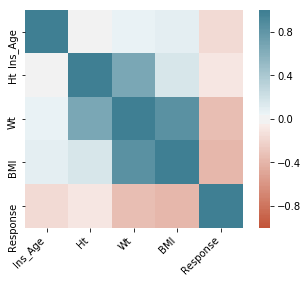

In [27]:
corr = rawdata[['Ins_Age','Ht','Wt','BMI','Response']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the above corellation matrix we can see there is corellation between BMI, Age, Weight, Height and the response (risk factor) for the insurance applicants.

There is a good negative corellation between the features and the risk factors. We can confirm this from the dataset as BMI increases we have the less respnse value which relates to more risk factor. So this corellation makes sense because features will be inversely related to risk factor.

________________

### Processing data for machine learning models

In [28]:
from sklearn import preprocessing

In [29]:
X = rawdata.iloc[:,:-1] #Selecting all columns except the last target column

In [30]:
Y = rawdata['Response']

In [31]:
X.shape

(19501, 115)

Finding the number of data points for each classification class. For a good model it is advised to have equal number of data points for each class so that the model doesn't overfit on the biggest class.

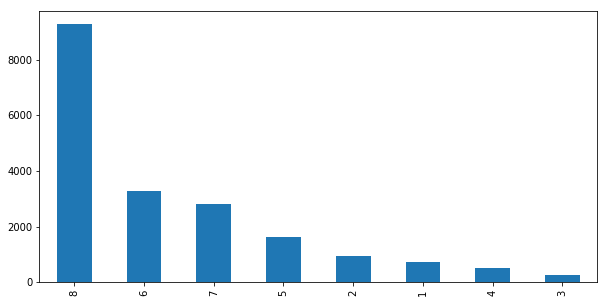

In [32]:
plt.figure(figsize=(10,5))
rawdata.Response.value_counts().plot(kind='bar');
plt.show()

We can see from the resposnses that the dataset is imbalanced and if we try to build a model to predict the responses the model would be baised towards predicting classes that have lot of data points to train on.

In order to deal with the imbalance we have to do data augmentation on the class with least data points or on class with max data points.

Deciding on whether to undersample or oversample the class depends on the the problem that's being solved. We can see that there are around 18000 datapoints for response value of 8 while there is only 1500 data points for response 3 and 4. When compared with the other responses it makes sense to over sample the minority classes. While oversampling the minority class we need to take care that the over sampling shouldn't lead to model overfitting on those classes. 

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'not majority')
X_resampled, Y_resampled = sm.fit_resample(X, Y)

In [34]:
unique, counts = np.unique(Y_resampled, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   1 9293]
 [   2 9293]
 [   3 9293]
 [   4 9293]
 [   5 9293]
 [   6 9293]
 [   7 9293]
 [   8 9293]]


In [35]:
X_resampled.shape

(74344, 115)

After over sampling we can see that all the classes now have same number of datapaoints to works with so that whatever model is built to predict the risk factors doesn't overfit

Splitting the datapoints for training and testing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled,Y_resampled, test_size = 0.20, random_state = 1)

In [84]:
X_test.shape

(14869, 115)

In [39]:
X_train

array([[3.57142528e+04, 1.00000000e+00, 1.42028633e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.56940101e+04, 1.00000000e+00, 1.55610986e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.08448755e+04, 1.00000000e+00, 1.48065143e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.91782652e+04, 1.00000000e+00, 1.61797666e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.75342497e+04, 1.00000000e+00, 1.01907822e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07980000e+04, 1.00000000e+00, 7.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Standardizing the data and applying PCA

Since we have values that are of various ranges acroos the features, we need to scale them so that they are standardized within a particular range and it would help the PCA while dimension reduction. It helps the PCA select the components with maximum variance.

In [40]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

After standardization of the data points, its time to apply PCA for reducing the dimensions

Here in this case we want the data points to have variance so that while reducing diension through PCA, it will make the datpoints easily classifiable by the machine learning models

The other task is to find the optimum number of components to select. We want to maximize the variance which can be determined by looking at the cumulative explained variance ratio as a function of the number of components.

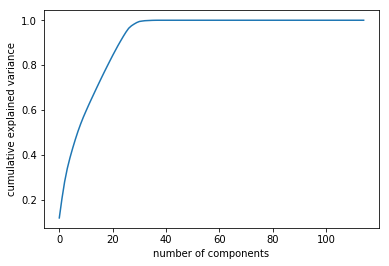

In [41]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We can see from the graph that the optimum number of components have to be anything above 25

In [42]:
pca = RandomizedPCA(n_components=27, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [43]:
X_train_pca.shape

(59475, 27)

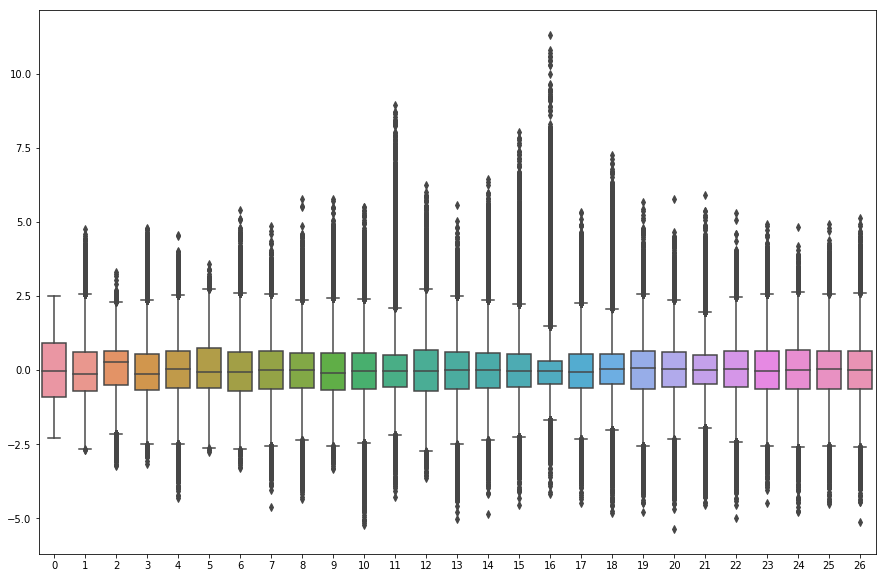

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(data=X_train_pca)

_________________

## Machine learning models for prediction of risk factors

### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=750, random_state=45,bootstrap= False, criterion= 'entropy')

In [47]:
rf.fit(X_train_pca,Y_train)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=750, n_jobs=None, oob_score=False,
            random_state=45, verbose=0, warm_start=False)

In [48]:
rfpred = rf.predict(X_test_pca)

In [49]:
rfpred.shape

(14869,)

              precision    recall  f1-score   support

           1       0.93      0.92      0.92      1899
           2       0.88      0.93      0.91      1697
           3       0.99      0.97      0.98      1902
           4       0.99      0.90      0.94      2018
           5       0.91      0.84      0.88      1999
           6       0.72      0.82      0.76      1588
           7       0.76      0.82      0.79      1816
           8       0.81      0.78      0.80      1950

   micro avg       0.87      0.87      0.87     14869
   macro avg       0.87      0.87      0.87     14869
weighted avg       0.88      0.87      0.87     14869

Confusion matrix:
 [[1738   12    7    7   36   16   21   32]
 [  22 1585    9   18   62   27   41   30]
 [   0    4 1837    6    2    2    0    0]
 [   1    1    1 1825    3   10    6    4]
 [  26   17    8   13 1688   34   45   21]
 [  40   28   21   80  122 1296  105  120]
 [  45   27   13   23   58   84 1483  214]
 [  27   23    6   46   28  1

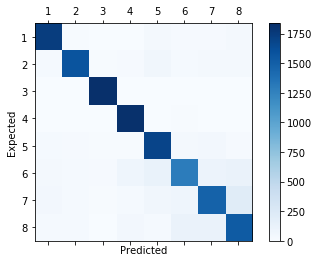

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(rfpred,Y_test))

conf_mat = confusion_matrix(y_true=Y_test, y_pred=rfpred)
print('Confusion matrix:\n', conf_mat)

labels = ['1','2','3','4','5','6','7','8']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Grid search the Random Forest Classifier

In [69]:
grid_param = {
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [70]:
from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=rf,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1)

In [71]:
gd_sr.fit(X_train_pca,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=45, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [72]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 500}


_____________

### Support Vector Classifier

In [53]:
from sklearn.svm import SVC

In [54]:
svmmodel = SVC(C=10, kernel = 'rbf',gamma=0.1)

In [55]:
svmmodel.fit(X_train_pca,Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
svmpred = svmmodel.predict(X_test_pca)

In [57]:
svmpred.shape

(14869,)

              precision    recall  f1-score   support

           1       0.97      0.93      0.95      1951
           2       0.96      0.92      0.94      1871
           3       1.00      0.98      0.99      1891
           4       1.00      0.96      0.98      1925
           5       0.91      0.91      0.91      1859
           6       0.77      0.82      0.80      1700
           7       0.77      0.84      0.81      1790
           8       0.80      0.80      0.80      1882

   micro avg       0.90      0.90      0.90     14869
   macro avg       0.90      0.89      0.90     14869
weighted avg       0.90      0.90      0.90     14869

Confusion matrix:
 [[1816   11    2    1   15   10   10    4]
 [  12 1720    4    4   15   16   12   11]
 [   0    0 1850    0    0    1    0    0]
 [   0    0    1 1842    3    2    3    0]
 [  22   33    6    4 1688   44   30   25]
 [  31   37   13   45   64 1401   88  133]
 [  43   40    5   10   45   96 1506  202]
 [  27   30   10   19   29  1

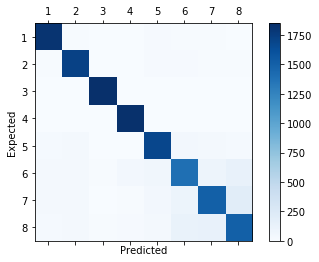

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(svmpred,Y_test))

conf_mat = confusion_matrix(y_true=Y_test, y_pred=svmpred)
print('Confusion matrix:\n', conf_mat)

labels = ['1','2','3','4','5','6','7','8']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#### Grid search to find best parameters for SVM model

In [75]:
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1,10]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svmmodel, param_grid = param_grid, cv=5,n_jobs=-1)

In [77]:
grid_search.fit(X_train_pca,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
best_params = grid_search.best_params_
print(best_params)

{'C': 10, 'gamma': 0.1}


____________________